In [69]:
# RUN THIS CELL
# import packages, check folders

#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
#print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook
#data_file_loc = os.getcwd()
data_file_loc

'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data'

In [70]:
# to load yes/no timecourses
def get_trial_timecourses_respbased():
    # returns timeourses and means of yes and no responders separately. dims (1049, 268, 28, 10)
    # doesn't take any inputs, but data_file_loc (location with responseinfo and movie timecourse) 
    # needs to be previously defined
    # Other info: 1. the 'responses' file has a mat of dims nsub*nmovies
    # 2. each movie timecourse file has the dims: nsub*nnodes*ntimepts(43)
    
    responses = np.load(os.path.join(data_file_loc,'responses_slopereg.npy')) # subs*movies
    nmovies = 10
    fileName = os.path.join(data_file_loc,'timecourses_run_norm','timecourse-all-movies.npy')
    tc_all = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
    
        
    for movie_ind in range(nmovies):
        movieTC = tc_all[:,:,:28,movie_ind]
        
        resp_yes = responses[:,movie_ind] == 1
        resp_no = responses[:,movie_ind] == 0
        resp_unsure = responses[:,movie_ind] == 9
        
        if movie_ind == 0:
            movie_tc_yes = np.empty((movieTC.shape[0],movieTC.shape[1],movieTC.shape[2],nmovies))
            movie_tc_no  = np.empty((movieTC.shape[0],movieTC.shape[1],movieTC.shape[2],nmovies))
            movie_tc_unsure  = np.empty((movieTC.shape[0],movieTC.shape[1],movieTC.shape[2],nmovies))
            movie_tc_yes[:] = np.nan
            movie_tc_no[:] = np.nan
            movie_tc_unsure[:] = np.nan
        
        movie_tc_yes[resp_yes,:,:,movie_ind] = movieTC[resp_yes,:,:] # fills out only yes rows
        movie_tc_no[resp_no,:,:,movie_ind] = movieTC[resp_no,:,:] # fills out only no rows
        movie_tc_unsure[resp_unsure,:,:,movie_ind] = movieTC[resp_unsure,:,:] # fills out only no rows
        # nsubs * nnodes * ntimepts * nmovies
    
    return movie_tc_yes, movie_tc_no, movie_tc_unsure

# creating the yes/no timecourse files of dim (1049, 268, 28, 10)
movie_tc_yes, movie_tc_no, movie_tc_unsure = get_trial_timecourses_respbased()
movie_tc_unsure.shape

(1049, 268, 28, 10)

In [71]:
#pip install -U notebook-as-pdf

In [72]:
# import Shen ROI labels for later plots
pd.set_option('display.max_colwidth', None) # so columns are not snipped

# loading the Shen atlas labels
shen268 = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268.head()

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [4]:
# Import best response functions for each node, for Yes and No groups
# 0: sigmoid, 1:sinusoidal, 2: Gaussian, 3: delayed sine

df_best_fns = pd.read_csv(os.path.join(working_dir,'Best_functions.csv'))

fns_same = df_best_fns["YesResponders"].values==df_best_fns["NoResponders"].values
fns_yes = df_best_fns["YesResponders"].values
fns_no = df_best_fns["NoResponders"].values

df_best_fns.head(10)

,Unnamed: 0,AllSubs,YesResponders,NoResponders
0,0,0,3,0
1,1,0,0,0
2,2,2,2,1
3,3,2,0,0
4,4,0,0,0
5,5,2,2,2
6,6,3,3,0
7,7,0,0,0
8,8,3,3,0
9,9,0,0,0


In [5]:
# Loading node labels assigned based on the activity at the last TR
comparisons_all = np.load(os.path.join(working_dir,'End_point_comparisons.npy'), allow_pickle=True)
comparisons_all

props = [['Magnitude (Amp) Yes-No', 'log(1+Center/Amp) Yes-No', 'log(1+Variance/Amp), Yes-No'],['Amplitude', 'Frequency/Amp', 'Phase'],
         ['Mag.(AYes-ANo)', 'log(Center/Amp)', 'log(Variance/Amp)'],['Step_onset','Amplitude', 'Frequency', 'Phase']]


## Perform bootstrap curve-fitting and t-tests per movie

### Step 1: Bootstrapping all movies seaprately, averaging, saving mean TCs

- redo at some point if we need to see how consistent results are across random random samples

In [46]:
# bootstrap samples, average and save yes/no for a movie

nrep =1000 # number of times to sub-sample
responses = np.load(os.path.join(data_file_loc,'responses_slopereg.npy'))
responses.shape


start = time.time()
for movie_ind in range(10):
    yes_sample = movie_tc_yes[responses[:,movie_ind]==1,:,:,movie_ind]
    no_sample = movie_tc_no[responses[:,movie_ind]==0,:,:,movie_ind]
    unsure_sample = movie_tc_unsure[responses[:,movie_ind]==9,:,:,movie_ind]


    print(f'time elapsed{(time.time()- start)/60}mins,\nMovie{movie_ind},yes: instances:{yes_sample.shape}, no instances:{no_sample.shape}')
    subsample_size = [yes_sample.shape[0],no_sample.shape[0],unsure_sample.shape[0]] # nr of yes responses.movie

    mean_tc_bs = np.empty((nrep,268,29,3))# dim2: 1 fnID, 28 timepts, dim3: yes/no/unsure
    mean_tc_bs[:] = np.nan            
    for iter in range(nrep):
        
        for i in range(3):# yes/no/unsure
            subs = np.random.choice(subsample_size[i],size = subsample_size[i], replace=True)
            subs = [int(i) for i in subs]
            if i ==0:
                fns = fns_yes
                mat = np.nanmean(yes_sample[subs,:,:], axis = 0) # average across trials to get 268*28
            elif i ==1:
                fns = fns_no
                mat = np.nanmean(no_sample[subs,:,:], axis = 0) # average across trials to get 268*28
            elif i == 2:
                fns = np.empty((268,))
                fns[:]=np.nan
                fns[fns_yes==fns_no] = fns_yes[fns_yes==fns_no] 
                mat = np.nanmean(unsure_sample[subs,:,:], axis = 0) # average across trials to get 268*28
            
            mat = np.hstack((np.reshape(fns,(268,1)),mat)) # 268*29 array
            mean_tc_bs[iter,:,:,i] = mat

    np.save(os.path.join(data_file_loc,'bootstrapped_mean_tcs',
                         f'Bootstrapped_tcs_movie{movie_ind}.npy'),mean_tc_bs)



time elapsed0.0007290323575337728mins,
Movie0,yes: instances:(978, 268, 28), no instances:(9, 268, 28)
time elapsed0.680557382106781mins,
Movie1,yes: instances:(20, 268, 28), no instances:(910, 268, 28)
time elapsed1.434199833869934mins,
Movie2,yes: instances:(56, 268, 28), no instances:(889, 268, 28)
time elapsed2.1807612697283427mins,
Movie3,yes: instances:(758, 268, 28), no instances:(108, 268, 28)
time elapsed3.5278791348139444mins,
Movie4,yes: instances:(88, 268, 28), no instances:(588, 268, 28)
time elapsed4.1605773647626245mins,
Movie5,yes: instances:(952, 268, 28), no instances:(35, 268, 28)
time elapsed4.958946049213409mins,
Movie6,yes: instances:(975, 268, 28), no instances:(19, 268, 28)
time elapsed5.775369052092234mins,
Movie7,yes: instances:(42, 268, 28), no instances:(918, 268, 28)
time elapsed6.62816223303477mins,
Movie8,yes: instances:(994, 268, 28), no instances:(16, 268, 28)
time elapsed7.373432715733846mins,
Movie9,yes: instances:(47, 268, 28), no instances:(807, 268

In [7]:
movie_ind = 4
mean_tc_bs = np.load(os.path.join(data_file_loc,'bootstrapped_mean_tcs',
                         f'Bootstrapped_tcs_movie{movie_ind}.npy'))
mean_tc_bs.shape

(1000, 268, 29, 3)

### Step 2: Fit the mean timecourses to curves to obtain the best parameters (or load previously saved params)

In [7]:
try:
    from fit_fns_fMRI import logfit_fn,sinefit_fn, gaussianfit_fn, stepsine_fn, fit_goodness_test_fn, hello
    print('import successful!')
except:
    print('issue importing, using reload...')
    import importlib
    importlib.reload(fit_fns_fMRI)


from joblib import Parallel, delayed#,  cpu_count
#from multiprocessing import Pool
#from joblib import cpu_count

import successful!


In [8]:
load = 1 #
if load == 0:
    nrep = mean_tc_bs.shape[0]

    params_bs_movie = np.empty((nrep,268,6,2)) # 3rd dimension: 4 for params, 1 for rsq, 1 for fn 
    params_bs_movie[:] = np.nan

    start = time.time()
    for iter in range(nrep):
        if iter%50 ==0:
            print(f'Time elapsed {(time.time()- start)/60}mins,\nIter {iter}')

        for i in range(2):

            tcs = [y for y in mean_tc_bs[iter,:,:,i]]#268*29
            res = Parallel(n_jobs=10)(delayed(function_fit)(y) for y in tcs)

            # res is a list of lists. res[node_nr] contains 4 variables returned by logfit_fn, viz.  
            # params_best, param_keys, r2, result.aic
            # params_best returns the 3 params from logfit

            fns = fns_yes if i==0 else fns_no

            for n in range(268):
                #params_best, r2  = function_fit(mean_yes[n,:],fns_yes[n])
                if fns[n] <= 2:
                    params_bs_movie[iter,n,:3,i] = res[n][0] # 3 params
                elif fns[n] == 3:
                    params_bs_movie[iter,n,:4,i] = res[n][0] # 4 params
                params_bs_movie[iter, n, 4,i] = res[n][1] # rsq
                params_bs_movie[iter,n,5,i] = res[n][2] # fn ID

    #np.save(f'Bootstrap_params_movie{movie_ind}.npy', params_bs_movie)
    np.save(os.path.join(data_file_loc,'bootstrapped_params_moviewise',
                             f'Bootstrap_params_movie{movie_ind}.npy'),params_bs_movie)
    
else:
    print('loaded')
    params_bs_movie = np.load(os.path.join(data_file_loc,'bootstrapped_params_moviewise',
                             f'Bootstrap_params_movie{movie_ind}.npy'))

params_bs_movie.shape

loaded


(1000, 268, 6, 2)

In [32]:
np.where(mean_diff[:,2]>6)

(array([ 16,  22,  27,  58,  84,  94, 106, 110, 125, 140, 149, 175, 221,
        222, 223, 233, 257]),)

In [25]:
# Here, we adjust params for amp, take diffs between Yes and No and store nodes with the highest values

#def plot_params_fn(fn=0,thr=.001, nrep=1000):
import mne

fn = 0 # CHANGE FUNCTION HERE
thr = .001
nrep = 1000

t=np.empty((268,4)) # dim: nodes,params
t[:]=np.nan
p=np.empty((268,4))
p[:]=np.nan
mean_diff=np.empty((268,4))
mean_diff[:]=np.nan

yes_grp_all=np.empty((268,4)) # param values for the Ye group
yes_grp_all[:]=np.nan
no_grp_all=np.empty((268,4)) # param values for the Ye group
no_grp_all[:]=np.nan

yes_unc=np.empty((268,4)) # param values unocrrected for amplitude
no_unc=np.empty((268,4))

nparam=3 if fn<3 else 4

nodes= np.where((fns_same==1)&(df_best_fns["YesResponders"].values==fn))[0]
print(f'Fn:{fn}, nr. of nodes{len(nodes)}')

yes_all = params_bs_movie[:,:,:,0] # load bootstrapped parameters
no_all = params_bs_movie[:,:,:,1]

for pnum in range(nparam):
    for n in nodes:
        yes_grp = yes_all[:,n,pnum]
        yes_unc[n,pnum] = np.nanmean(yes_all[:,n,pnum])
        no_grp = no_all[:,n,pnum]
        no_unc[n,pnum] = np.nanmean(no_all[:,n,pnum])
        
        if fn%2==0: #sigmoid, gaussian
            if pnum > 0:
                yes_grp = np.divide(yes_grp,abs(yes_all[:,n,0]))
                no_grp = np.divide(no_grp,abs(no_all[:,n,0]))
        elif fn==1:#sine
            if pnum ==1:
                yes_grp = np.divide(yes_grp,abs(yes_all[:,n,0]))
                no_grp = np.divide(no_grp,abs(no_all[:,n,0]))
        else: # delayed sine
            if pnum > 1:
                yes_grp = np.divide(yes_grp,abs(yes_all[:,n,1]))
                no_grp = np.divide(no_grp,abs(no_all[:,n,1]))
                
        yes_grp_all[n,pnum] = np.nanmean(yes_grp)
        no_grp_all[n,pnum] = np.nanmean(no_grp)
        t[n,pnum],p[n,pnum] = stats.ttest_ind(yes_grp,no_grp)
        
        if fn %2==0:
            if pnum==0: # sine and delayed sine amplitudes are always positive
                mean_diff[n,pnum]= abs(np.nanmean(yes_grp))- abs(np.nanmean(no_grp))
            else:
                mean_diff[n,pnum]= np.nanmean(yes_grp)- np.nanmean(no_grp)
                
        else:
            mean_diff[n,pnum]= np.nanmean(yes_grp)- np.nanmean(no_grp)

    _, p[nodes,pnum] = mne.stats.fdr_correction(p[nodes,pnum], thr)# FDR correction

mean_diff[p>thr]= np.nan # assign nan to suprathreshold nodes (for plotting) # this line was commented out for the figure!!
#mean_diff[abs(mean_diff)>3000]= np.nan # too high param value diffs are removed here

p_signodes = [] # nodes with significant Yes-No diffs
fns_sig = []
params_sig=[]
for pnum in range(nparam):
    p_signodes.append(np.where(~np.isnan(mean_diff[:,pnum]))[0])
    #p_signodes.append(np.where(mean_diff[:,pnum]<thr)[0])
    fns_sig.append(fn)
    params_sig.append(pnum)
params_sig = np.array(params_sig)
fns_sig = np.array(fns_sig)
#p_signodes

nodes_list_pos = []
nodes_list_neg = []
sig_nodes_all = []
for pnum in range(nparam):
    sig_nodes = np.where(~np.isnan(mean_diff[:,pnum]))[0]
    sig_nodes_all.append(sig_nodes)
    df = pd.DataFrame({'nodes':sig_nodes,'amp':mean_diff[sig_nodes,pnum]})
    # highest and lowest nodes for each param
    nodes_list_pos.append([df.sort_values(by = 'amp',ascending=False).nodes[:10].values,df.sort_values(by = 'amp',ascending=False).amp[:10].values])
    nodes_list_neg.append([df.sort_values(by = 'amp',ascending=True).nodes[:10].values,df.sort_values(by = 'amp',ascending=True).amp[:10].values])





Fn:0, nr. of nodes167


In [49]:
for i in range(nparam):
    print('num nodes, param',i,'=',len(sig_nodes_all[i]),\
          'perc. nodes, param',i,'=',100*len(sig_nodes_all[i])/268) # sig nodes

num nodes, param 0 = 157 perc. nodes, param 0 = 58.582089552238806
num nodes, param 1 = 128 perc. nodes, param 1 = 47.76119402985075
num nodes, param 2 = 116 perc. nodes, param 2 = 43.28358208955224


In [17]:
mean_tc_bs.shape

(1000, 268, 29, 3)

In [7]:
tc_yes = mean_tc_bs[:,:,1:,0]
tc_no = mean_tc_bs[:,:,1:,1]

node_ind = 70

dict = eval(shen268[str(node_ind +1)][0])
nodename =dict['name']
nodename = nodename.split(';')
nodename = "\n".join(nodename)
print(nodename,'\n-----')


plt.figure(1,figsize = (6,5))
plt.errorbar(range(28),np.nanmean(movie_tc_yes[:,node_ind,:,movie_ind],axis=0),
             stats.sem(movie_tc_yes[:,node_ind,:,movie_ind],axis=0,nan_policy='omit'),
             color = 'r', label = 'Yes')
plt.errorbar(range(28),np.nanmean(movie_tc_no[:,node_ind,:,movie_ind],axis=0),
             stats.sem(movie_tc_yes[:,node_ind,:,movie_ind],axis=0,nan_policy='omit')
             ,color ='b', label = 'No')

plt.title("Node_ind:"+str(node_ind)+','+nodename, fontweight = 'bold')
plt.legend(fontsize = 14)



NameError: name 'mean_tc_bs' is not defined

In [8]:
tc_yes = mean_tc_bs[:,:,1:,0]
tc_no = mean_tc_bs[:,:,1:,1]

node_ind = 1

dict = eval(shen268[str(node_ind +1)][0])
nodename =dict['name']
nodename = nodename.split(';')
nodename = "\n".join(nodename)
print(nodename,'\n-----')


plt.figure(1,figsize = (6,5))
plt.errorbar(range(28),np.mean(tc_yes[:,node_ind,:],axis=0),stats.sem(tc_yes[:,node_ind,:],axis=0),
             color = 'r', label = 'Yes')
plt.errorbar(range(28),np.mean(tc_no[:,node_ind,:],axis=0),stats.sem(tc_no[:,node_ind,:],axis=0)
             ,color ='b', label = 'No')

plt.title("Node_ind:"+str(node_ind)+','+nodename, fontweight = 'bold')
plt.legend(fontsize = 14)


NameError: name 'mean_tc_bs' is not defined

### Plot brain maps

- Bootstrapping within movie: sample yes's and no's with replacement, estimate params and perform an LME with them (instead of a t-test). Code for the LME is in Run_LME.ipynb

- Nodes showing a sig differences in each parameter for yes vs. no are plotted when yes and no follow the same fn. If not, they are plotted separately (right?).. work in progrss




In [14]:
fig = plt.figure()

fig.patch.set_facecolor('none')


<Figure size 432x288 with 0 Axes>

param, max 0 :  [154]
param, min 0 :  154
param, min 1 :  [  1  52  91  98 136 201 234 260 266]
param, min 1 :  1
param, min 2 :  [  1  91  98 114 234 266]
param, min 2 :  91


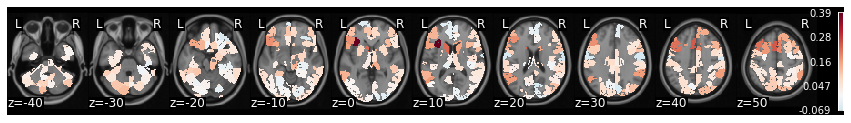

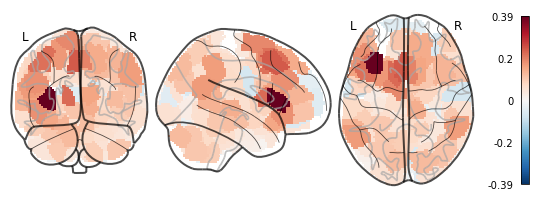

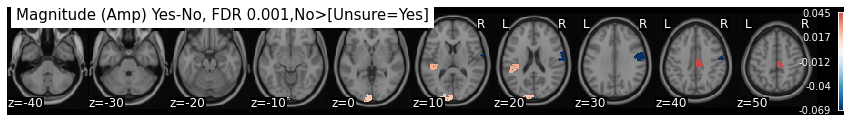

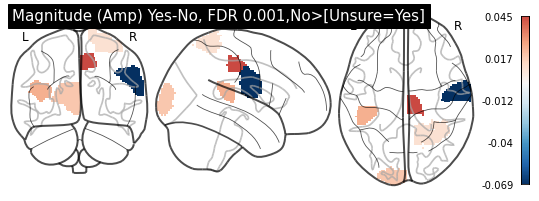

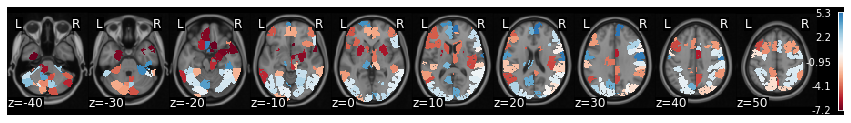

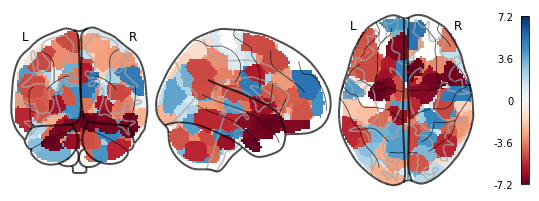

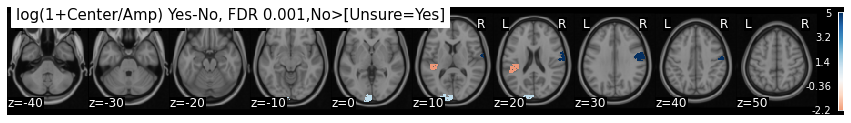

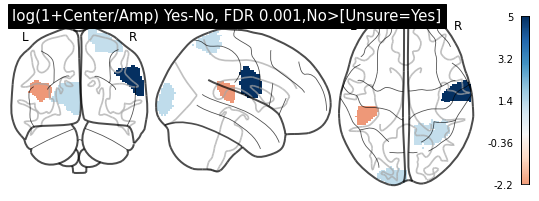

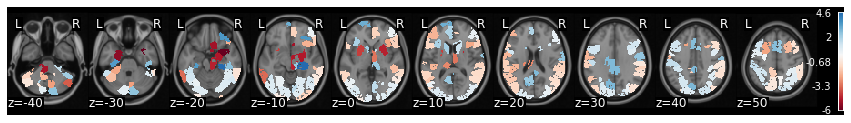

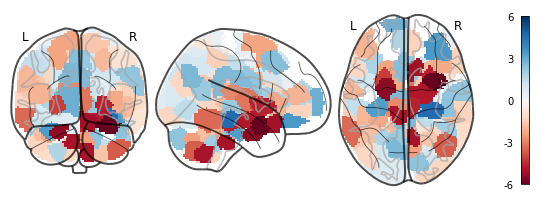

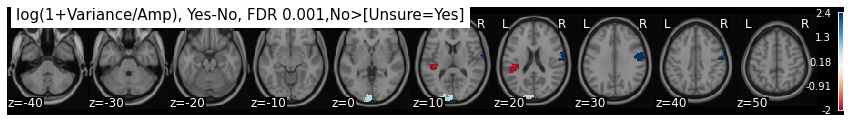

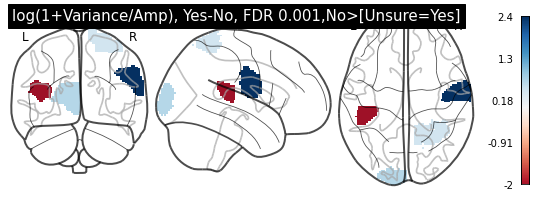

In [20]:
fn = 0
nparam=3 if fn<3 else 4

#print(fn)
DV = np.empty((268,nparam))
DV[:]=np.nan
for pnum in range(nparam):
    if (fn<3):
        if pnum == 0:
            print('param, max',pnum,': ',np.where(mean_diff[:,pnum]>.8*np.nanmax(mean_diff[:,pnum]))[0])
            print('param, min',pnum,': ',np.nanargmax(mean_diff[:,pnum]))

        else:
            print('param, min',pnum,': ',np.where(mean_diff[:,pnum]<.3*np.nanmin(mean_diff[:,pnum]))[0])
            print('param, min',pnum,': ',np.nanargmin(mean_diff[:,pnum]))

    #img = roi_to_brain(pd.Series(mean_diff[:,pnum]), mask_x)
    
    if ((fn%2==0 and pnum > 0) or (fn==1 and pnum ==1)):
        DV[:,pnum] = np.multiply(np.sign(mean_diff[:,pnum]),np.log(1+abs(mean_diff[:,pnum])))
        
    else:
        DV[:,pnum] = mean_diff[:,pnum]
    
    img = roi_to_brain(pd.Series(DV[:,pnum]), mask_x)

    #title_str =props[fn][pnum] + ', FDR ' +str(thr)]
    #title_Str = props[fn][pnum]
    title_str  = ''
    
    if ((fn <3) and (pnum==0)) or ((fn==3) and (pnum==1)):
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu_r',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str,colorbar = True, plot_abs=False, cmap = 'RdBu_r')
    else:
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str,colorbar = True, plot_abs=False, cmap = 'RdBu')

    
    #ultimate soial decider (1),nonsocial decider
    node_type = 3
    rois = np.empty((268,))
    rois[:]=np.nan
    rois[comparisons_all.item()['Nodes'][node_type]]=DV[comparisons_all.item()['Nodes'][node_type],pnum]
    #diss_nodes = 1-corr_yn
    #rois[diss_nodes < .05] = np.nan 
    img = roi_to_brain(pd.Series(rois), mask_x)
    
    title_str = props[fn][pnum] + ', FDR ' +str(thr)+','+ comparisons_all.item()['lbls'][node_type]
    #title_str  = ''
    if ((fn <3) and (pnum==0)) or ((fn==3) and (pnum==1)):
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu_r',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str,colorbar = True,symmetric_cbar = False, plot_abs=False, cmap = 'RdBu_r')


    else:
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str ,colorbar = True, symmetric_cbar = False,plot_abs=False, cmap = 'RdBu')






param, max 0 :  [154]
param, min 0 :  154
param, min 1 :  [  1  51  52  82  88  91 136 150 201 234 262]
param, min 1 :  88
param, min 2 :  [88]
param, min 2 :  88


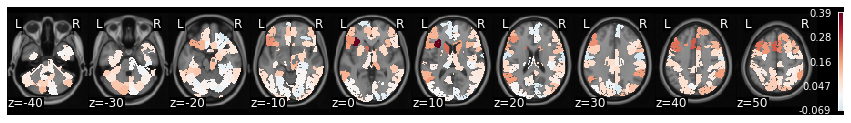

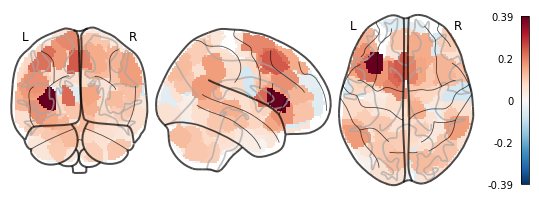

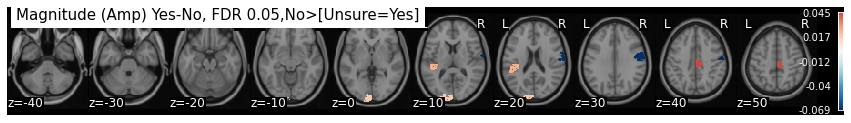

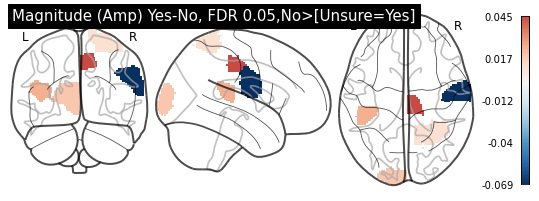

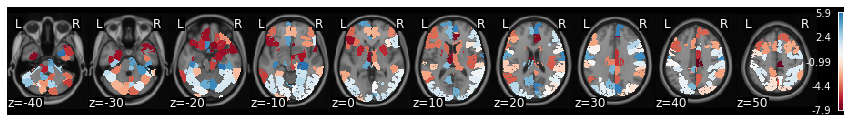

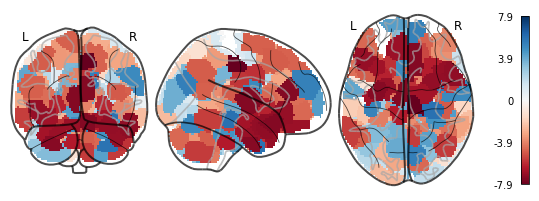

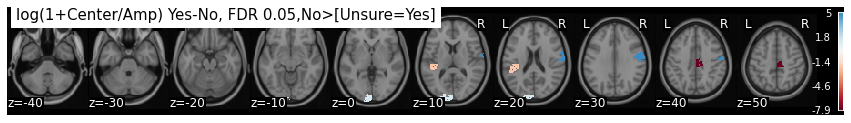

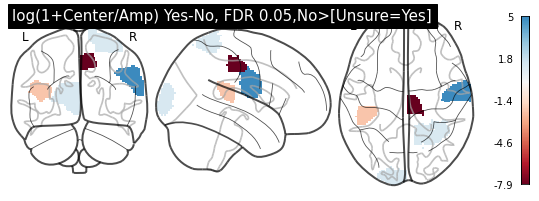

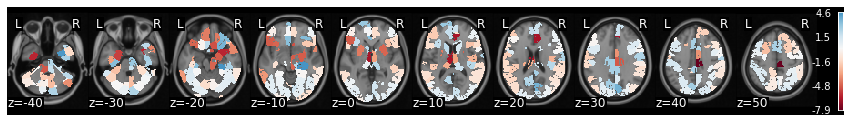

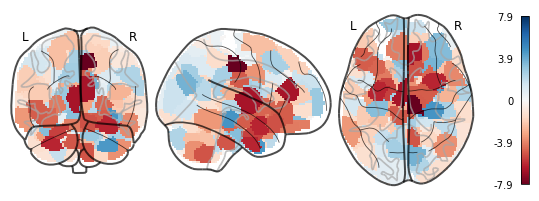

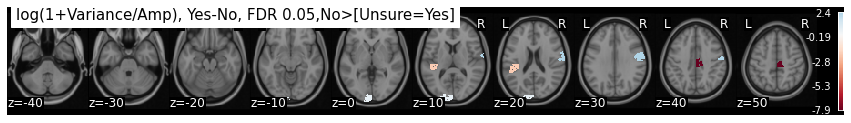

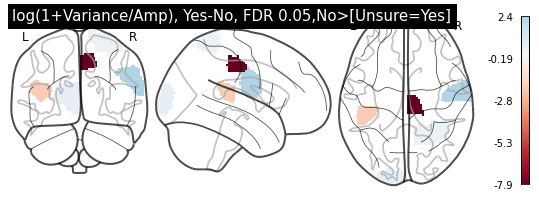

In [18]:
# saving the figures here (this was wrong and un-thresholded)
fn = 0
nparam=3 if fn<3 else 4

#print(fn)
DV = np.empty((268,nparam))
DV[:]=np.nan
for pnum in range(nparam):
    if (fn<3):
        if pnum == 0:
            print('param, max',pnum,': ',np.where(mean_diff[:,pnum]>.8*np.nanmax(mean_diff[:,pnum]))[0])
            print('param, min',pnum,': ',np.nanargmax(mean_diff[:,pnum]))

        else:
            print('param, min',pnum,': ',np.where(mean_diff[:,pnum]<.3*np.nanmin(mean_diff[:,pnum]))[0])
            print('param, min',pnum,': ',np.nanargmin(mean_diff[:,pnum]))

    #img = roi_to_brain(pd.Series(mean_diff[:,pnum]), mask_x)
    
    if ((fn%2==0 and pnum > 0) or (fn==1 and pnum ==1)):
        DV[:,pnum] = np.multiply(np.sign(mean_diff[:,pnum]),np.log(1+abs(mean_diff[:,pnum])))
        
    else:
        DV[:,pnum] = mean_diff[:,pnum]
    
    img = roi_to_brain(pd.Series(DV[:,pnum]), mask_x)

    #title_str =props[fn][pnum] + ', FDR ' +str(thr)]
    #title_Str = props[fn][pnum]
    title_str  = ''
    
    if ((fn <3) and (pnum==0)) or ((fn==3) and (pnum==1)):
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu_r',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str,colorbar = True, plot_abs=False, cmap = 'RdBu_r')
    else:
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str,colorbar = True, plot_abs=False, cmap = 'RdBu')

    
    #ultimate soial decider (1),nonsocial decider
    node_type = 3
    rois = np.empty((268,))
    rois[:]=np.nan
    rois[comparisons_all.item()['Nodes'][node_type]]=DV[comparisons_all.item()['Nodes'][node_type],pnum]
    #diss_nodes = 1-corr_yn
    #rois[diss_nodes < .05] = np.nan 
    img = roi_to_brain(pd.Series(rois), mask_x)
    
    title_str = props[fn][pnum] + ', FDR ' +str(thr)+','+ comparisons_all.item()['lbls'][node_type]
    #title_str  = ''
    if ((fn <3) and (pnum==0)) or ((fn==3) and (pnum==1)):
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu_r',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str,colorbar = True,symmetric_cbar = False, plot_abs=False, cmap = 'RdBu_r')


    else:
        img.plot(colorbar=True, title = title_str, cmap = 'RdBu',symmetric_cbar = False)
        plot_glass_brain(img.to_nifti(), title = title_str ,colorbar = True, symmetric_cbar = False,plot_abs=False, cmap = 'RdBu')



